# Lecture 04. Lasso and Ridge regression</center>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

We will work with a dataset of home prices in Boston (UCI repository)
Downloading data

In [2]:
boston = load_boston()
X, y = boston['data'], boston['target']

/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

**Data description:**

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**First 2 rows:**

In [5]:
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

## Lasso regression

Lasso regression solves the problem of minimizing the mean-squared error with L1 regularization:
$$ J(w) = \frac{1}{2} \sum_{i=1}^m {(y_i - w^Tx_i)}^2 + \lambda \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ – equation depending on model parameters $w$, $m$ - number of objects in the dataset $X$, $d$ – number of features, $y$ – target value, $\alpha$ – regularization coefficient.

**Train Lasso regression with a small coefficient $ \alpha $ (weak regularization). Only the coefficient at the NOX feature (concentration of nitrogen oxides) is decreased. This means that it is the least important for predicting the target attribute - the median value of houses in the area.**

In [6]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X,y)
lasso.coef_

array([-1.07993501e-01,  4.64247572e-02,  2.04177418e-02,  2.68491110e+00,
       -1.77328270e+01,  3.80991359e+00,  6.66335859e-04, -1.47503617e+00,
        3.05973840e-01, -1.23375103e-02, -9.52382775e-01,  9.31343097e-03,
       -5.24814591e-01])

**Train Lasso regression with $ \alpha = 10 $. Now, non-zero coefficients remained only with the fetaures ZN, TAX, B and LSTAT**

In [7]:
lasso = Lasso(alpha=10)
lasso.fit(X,y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

**Thus, Lasso regression serves as a method for feature selection**

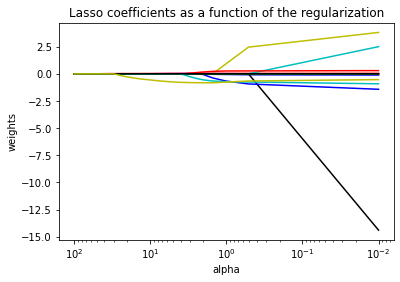

In [8]:
n_alphas = 200
alphas = np.linspace(0.01, 100, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                          ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

**Now we determine the best value of $ \alpha $ in the cross-validation process**

In [10]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([1.00000000e-02, 5.12462312e-01, 1.01492462e+00, 1.51738693e+00,
       2.01984925e+00, 2.52231156e+00, 3.02477387e+00, 3.52723618e+00,
       4.02969849e+00, 4.53216080e+00, 5.03462312e+00, 5.53708543e+00,
       6.03954774e+00, 6.54201005e+00, 7.04447236e+00, 7.54693467e+00,
       8.04939698e+00, 8.55185930e+00, 9.05432161e+00, 9.55678392e+00,
       1.00592462e+01, 1.05617085e+0...
       8.84433668e+01, 8.89458291e+01, 8.94482915e+01, 8.99507538e+01,
       9.04532161e+01, 9.09556784e+01, 9.14581407e+01, 9.19606030e+01,
       9.24630653e+01, 9.29655276e+01, 9.34679899e+01, 9.39704523e+01,
       9.44729146e+01, 9.49753769e+01, 9.54778392e+01, 9.59803015e+01,
       9.64827638e+01, 9.69852261e+01, 9.74876884e+01, 9.79901508e+01,
       9.84926131e+01, 9.89950754e+01, 9.94975377e+01, 1.00000000e+02]),
        cv=3, random_state=17)

In [11]:
lasso_cv.coef_

array([-0.08277424,  0.04955071, -0.00452281,  0.        , -0.        ,
        2.46012415,  0.00402472, -0.92931827,  0.27728228, -0.0154542 ,
       -0.75790377,  0.00943946, -0.65894934])

In [12]:
lasso_cv.alpha_

0.5124623115577889

**The `cross_val_score` method maximizes the metric, so instead of
minimize MSE we will maximize the negative MSE - `neg_mean_squared_error`**

In [13]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                scoring='neg_mean_squared_error')

array([-18.29476521, -50.20739669, -69.59729776])

**To nevertheless interpret the result in terms of MSE, we output the module of the mean value of the metric `neg_mean_squared_error` in cross-validation**

In [14]:
abs(np.mean(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                        scoring='neg_mean_squared_error')))

46.03315322184881

In [15]:
abs(np.mean(cross_val_score(Lasso(9.95), X, y, cv=3 , scoring='neg_mean_squared_error')))

53.722660877158454

**Another ambiguous point: LassoCV sorts the parameter values in descending order - it’s easier to optimize. Because of this, it might seem that optimizing the $ \alpha $ parameter is not working properly**

In [16]:
lasso_cv.alphas[:10] # значения параметров на входе

array([0.01      , 0.51246231, 1.01492462, 1.51738693, 2.01984925,
       2.52231156, 3.02477387, 3.52723618, 4.02969849, 4.5321608 ])

In [17]:
lasso_cv.alphas_[:10] # преобразованные значения параметров

array([100.        ,  99.49753769,  98.99507538,  98.49261307,
        97.99015075,  97.48768844,  96.98522613,  96.48276382,
        95.98030151,  95.4778392 ])

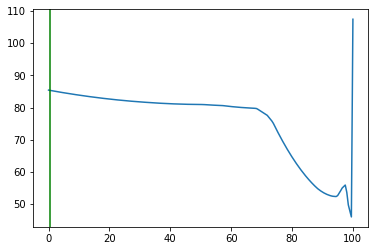

In [18]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1)) # неверно
plt.axvline(lasso_cv.alpha_, c='g');

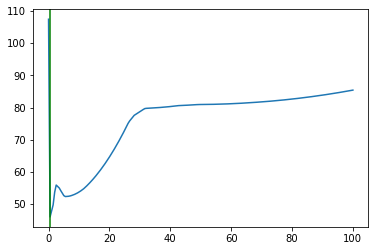

In [19]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1)) # верно
plt.axvline(lasso_cv.alpha_, c='g');

## Ridge regression

Ridge regression (or ridge regression) solves the problem of minimizing the mean-squared error with L2 regularization:
$$ J(w) = \frac{1}{2} \sum_{i=1}^m {(y_i - w^Tx_i)}^2 + \lambda \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ – hyperplane equation depending on model parameters $w$, $m$ - dataset size $X$, $d$ – number of features, $y$ – target variable, $\alpha$ – regularizatino coefficient.

In [20]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [21]:
ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [22]:
ridge_cv.alpha_

264.30814869741084

**В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.**

In [23]:
ridge_cv.coef_

array([-0.09975818,  0.05562804, -0.05006572,  0.30202744, -0.09151777,
        1.42295311,  0.01289136, -0.99866364,  0.33080392, -0.01661515,
       -0.81984784,  0.00876309, -0.72318342])

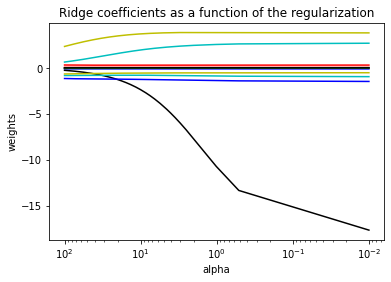

In [24]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                         ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Links
- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html) Generalized Linear Models Scikit-learn
- [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV), [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) и [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) в Scikit-learn


Author: [Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Nerses Bagiyan](https://www.linkedin.com/in/nersesbagiyan/), [Yulia Klimushina](https://www.linkedin.com/in/yuliya-klimushina-7168a9139), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.